EN3150 Assignment 01: Learning from data and related
challenges and linear models for regression
Sampath K. Perera
August 23, 2023

1. 1,2


<StemContainer object of 3 artists>

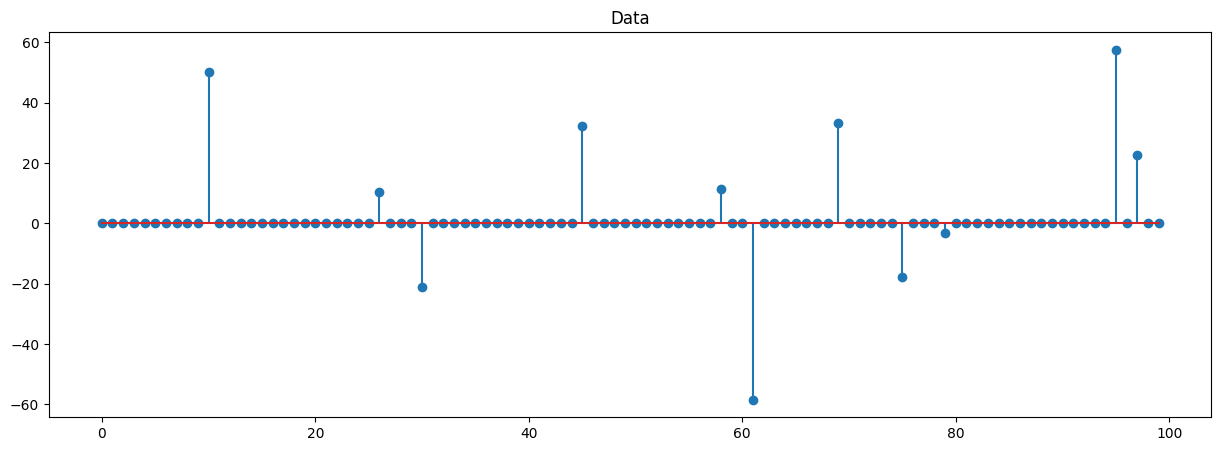

In [134]:
import numpy as np
import matplotlib.pyplot as plt

def generate_signal(signal_length, num_nonzero):
    
    signal = np.zeros(signal_length)
    nonzero_indices = np.random.choice(signal_length, num_nonzero, replace=False)
    nonzero_values = 50*np.random.randn(num_nonzero)  
    signal[nonzero_indices] = nonzero_values
    return signal

signal_length = 100  # Total length of the signal
num_nonzero = 10    # Number of non-zero elements in the signal
your_index_no=200134 # Enter without english letter and without leading zeros
signal = generate_signal(signal_length, num_nonzero)
signal[10] = (your_index_no % 10)*10 + 10
if  your_index_no % 10 == 0:
  signal[10] = np.random.randn(1) + 30


signal=signal.reshape(signal_length,1)
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title("Data")
plt.stem(signal)


1.3

In [135]:
#MaxAbsScaler
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
scaler.fit(signal)
scaled_data_MaxAbsScaler = scaler.transform(signal)

#min-max
def min_max_scale(data):
    min_val = np.min(data)
    max_val = np.max(data)
    print("min of data", min_val, "max of data", max_val)
    scaled_data = (data - min_val) / (max_val - min_val)
    return scaled_data

scaled_data_min_max = min_max_scale(signal)

#standard normalization
def stnd_normlztion(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    print("mean of data", mean, "standard deviation of data", std_dev)
    scaled_data = (data - mean) / (std_dev)
    return scaled_data
scaled_data_std_nmlz = stnd_normlztion(signal)

min of data -58.45160449132689 max of data 57.48892406330766
mean of data 1.1679025881021887 standard deviation of data 11.291679807236878


1. 4


<StemContainer object of 3 artists>

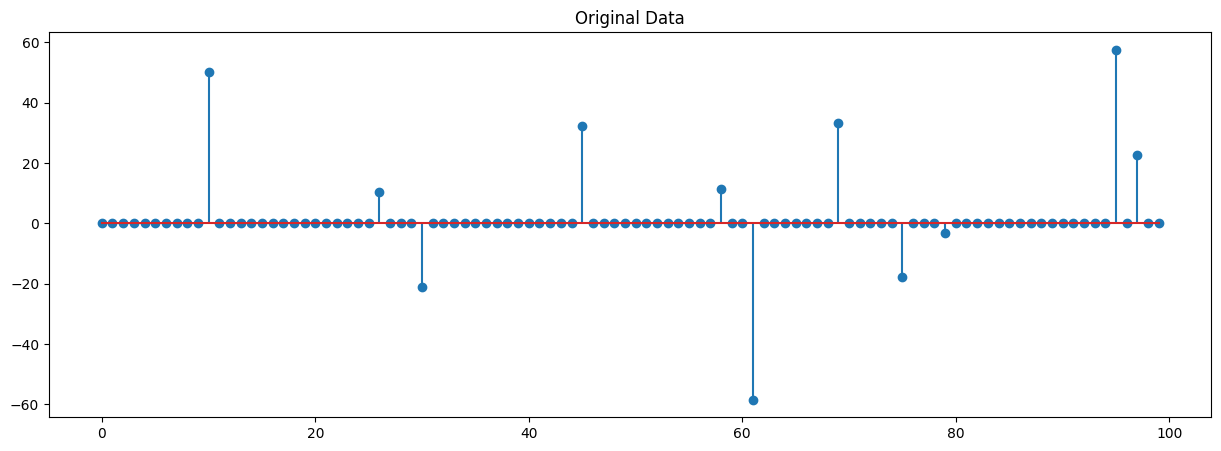

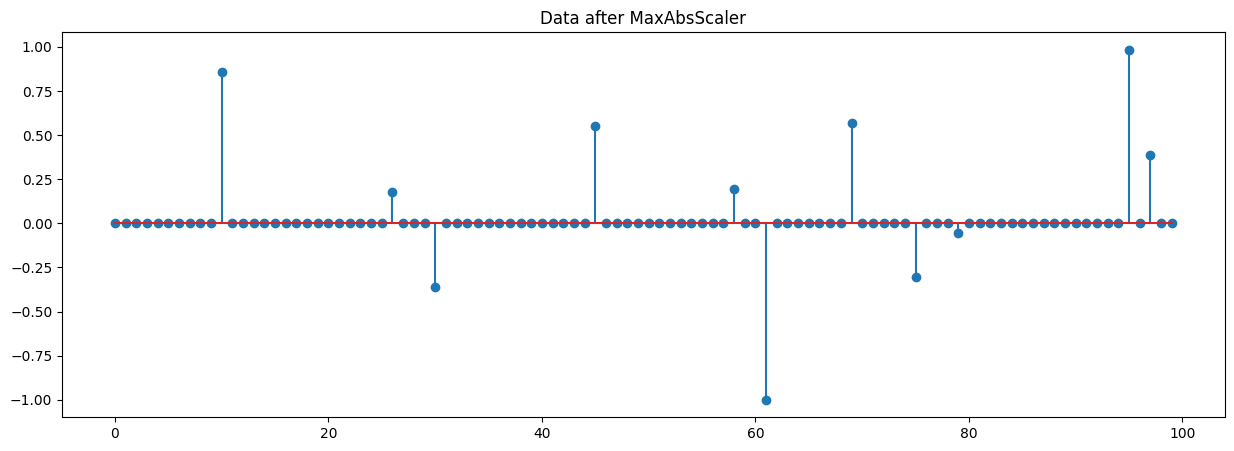

In [136]:
signal=signal.reshape(signal_length,1)
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title("Original Data")
plt.stem(signal)

scaled_data_MaxAbsScaler=scaled_data_MaxAbsScaler.reshape(signal_length,1)
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title("Data after MaxAbsScaler")
plt.stem(scaled_data_MaxAbsScaler)




<StemContainer object of 3 artists>

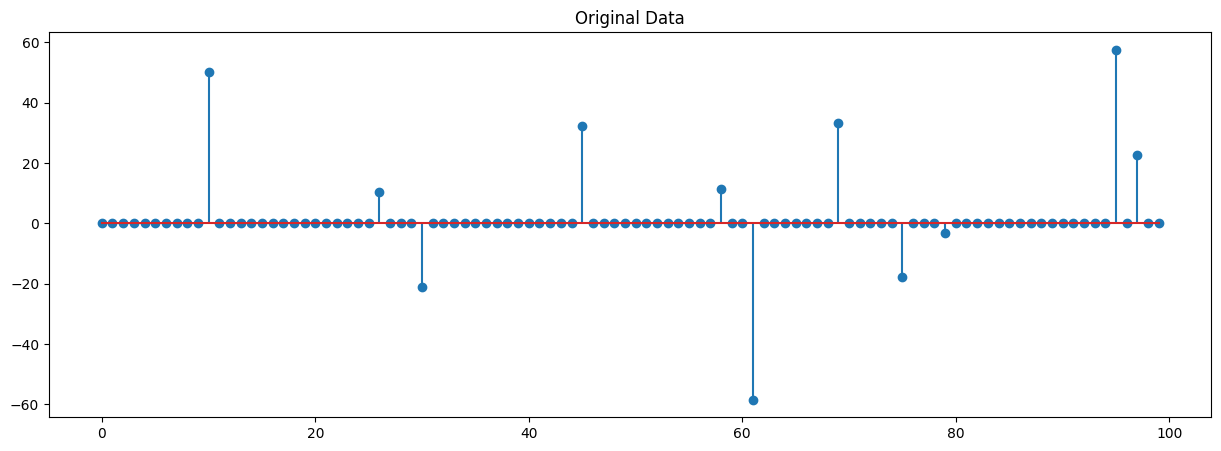

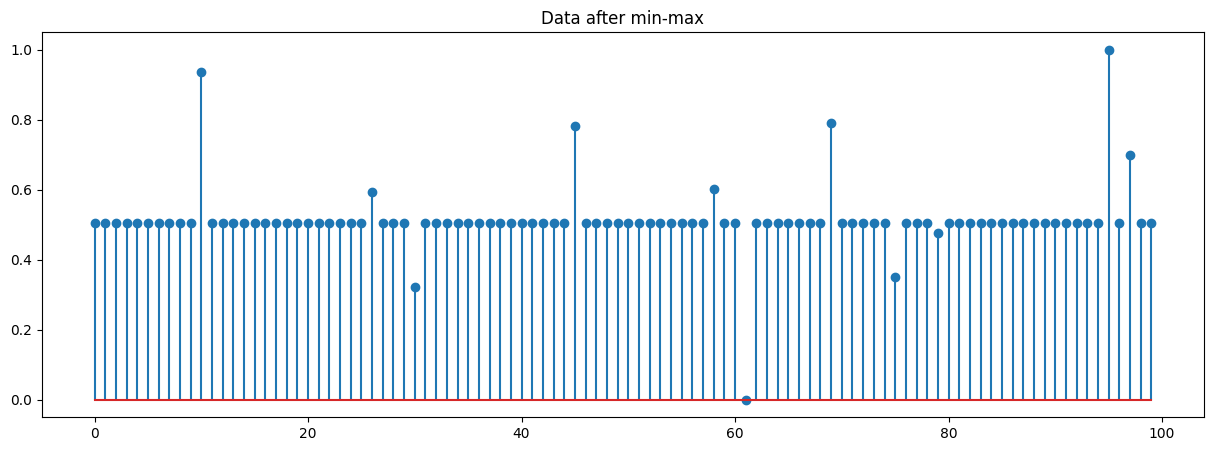

In [137]:

plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title("Original Data")
plt.stem(signal)

scaled_data_min_max=scaled_data_min_max.reshape(signal_length,1)
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title("Data after min-max")
plt.stem(scaled_data_min_max)




2. 1

In [138]:
import numpy as np
import pandas as pd

#Load data from CSV

file_path = r'Advertising.csv'

df = pd.read_csv(file_path)

print(df.head())

   sample index     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9


2.2

In [139]:
from sklearn.model_selection import train_test_split

x = df[['TV', 'radio', 'newspaper']]
y = df['sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

2.3

In [140]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:")
for feature, coef in zip(x.columns, coefficients):
    print(f"{feature}: {coef}")

print(f"Intercept: {intercept}")

Coefficients:
TV: 0.044584020119964325
radio: 0.196497034155405
newspaper: -0.0027814639819260622
Intercept: 2.994893030495323


2.4 Room for correction

In [141]:
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
#predict
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

#RSS
RSS_train = np.sum((y_train - y_train_pred) ** 2)
RSS_test = np.sum((y_test - y_test_pred) ** 2)

#RSE
N_train, d_train = x_train.shape[0], x_train.shape[1]  
N_test, d_test = x_test.shape[0], x_test.shape[1]

RSE_train = np.sqrt(RSS_train / (N_train - d_train))
RSE_test = np.sqrt(RSS_test / (N_test - d_test))

MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)

R2_train = model.score(x_train, y_train)
R2_test = model.score(x_test, y_test)
print("Training Data:")
print(f"RSS: {RSS_train}")
print(f"RSE: {RSE_train}")
print(f"MSE: {MSE_train}")
print(f"R2: {R2_train}")

print("\nTesting Data:")
print(f"RSS: {RSS_test}")
print(f"RSE: {RSE_test}")
print(f"MSE: {MSE_test}")
print(f"R2: {R2_test}")

x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()



Training Data:
RSS: 385.0903609310249
RSE: 1.566143303371191
MSE: 2.406814755818906
R2: 0.9067114990146383

Testing Data:
RSS: 176.08473165798722
RSE: 2.181523963097179
MSE: 4.40211829144968
R2: 0.8601145185017869


In [143]:
std_errors = model.bse
print("Standard Errors for each feature's coefficient:",'\n')
print(std_errors)
print('')

t_values = model.tvalues
print("t statistic for each feature's coefficient:",'\n')
print(t_values)
print('')

p_values = model.pvalues
print("p values for each feature's coefficient:",'\n')
print(p_values)


Standard Errors for each feature's coefficient: 

const        0.329968
TV           0.001476
radio        0.008934
newspaper    0.006171
dtype: float64

t statistic for each feature's coefficient: 

const         9.076301
TV           30.212152
radio        21.993929
newspaper    -0.450730
dtype: float64

p values for each feature's coefficient: 

const        4.646537e-16
TV           4.457494e-67
radio        1.148993e-49
newspaper    6.528098e-01
dtype: float64


2.7

In [142]:
new_data = pd.DataFrame({
    'TV': [25, 50, 0],
    'radio': [25, 0, 50],
    'newspaper': [0, 0, 0]
})  # Replace with your own values

# Make predictions on the multiple sets of input data
predictions = model.predict(new_data)

# Print the predictions
for i, pred in enumerate(predictions):
    print(f"Prediction {i + 1}: {pred}")

ValueError: shapes (3,3) and (4,) not aligned: 3 (dim 1) != 4 (dim 0)

3.2

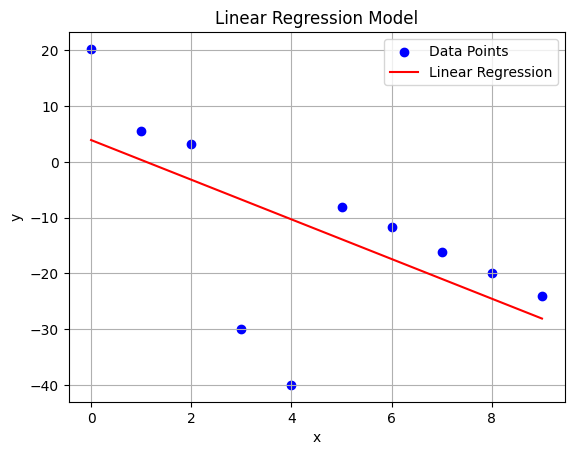

coefficients: [-3.55727273]
Intercept: 3.916727272727277


In [ ]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03])

# Create and fit a linear regression model
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)

# Generate predictions using the model
y_pred = model.predict(x.reshape(-1, 1))

# Plot the data points and the linear regression model
plt.scatter(x, y, label='Data Points', color='blue')
plt.plot(x, y_pred, label='Linear Regression', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Model')
plt.legend()
plt.grid(True)
plt.show()
coefficients = model.coef_
intercept = model.intercept_

print(f"coefficients: {coefficients}")

print(f"Intercept: {intercept}")

3.4

In [ ]:
import numpy as np

# Define the data points and true values
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y_true = np.array([20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03])

# Define the two linear models
def model_1(x):
    return -4 * x + 12.4  # Model 1: y = -4x + 12.4

def model_2(x):
    return -3.55 * x + 3.91  # Model 2: y = -3.55x + 3.91

# Define the loss function
def calculate_loss(y_true, y_pred, beta):
    N = len(y_true)
    squared_errors = (y_true - y_pred) ** 2
    robust_denominator = squared_errors + beta**2
    return np.mean(squared_errors / robust_denominator)

# Calculate the loss values for Model 1 and Model 2
beta = 1.0  # Given value for beta

loss_model_1 = calculate_loss(y_true, model_1(x), beta)
loss_model_2 = calculate_loss(y_true, model_2(x), beta)

print(f"Loss for Model 1: {loss_model_1}")
print(f"Loss for Model 2: {loss_model_2}")


Loss for Model 1: 0.517028821504114
Loss for Model 2: 0.9728470518681676


3.7

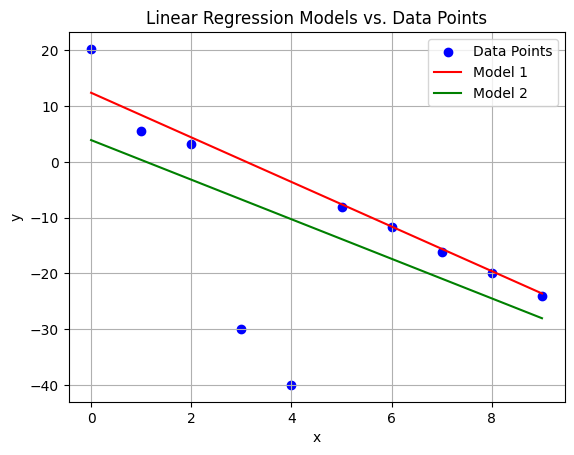

In [ ]:
import matplotlib.pyplot as plt

# Calculate model predictions for both Model 1 and Model 2
y_pred_model_1 = model_1(x)
y_pred_model_2 = model_2(x)

# Create a scatter plot of the data points
plt.scatter(x, y_true, label='Data Points', color='blue')

# Plot the two linear models
plt.plot(x, y_pred_model_1, label='Model 1', color='red')
plt.plot(x, y_pred_model_2, label='Model 2', color='green')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Models vs. Data Points')
plt.legend()
plt.grid(True)
plt.show()
